In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Competition_Data.csv')

In [ ]:
data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


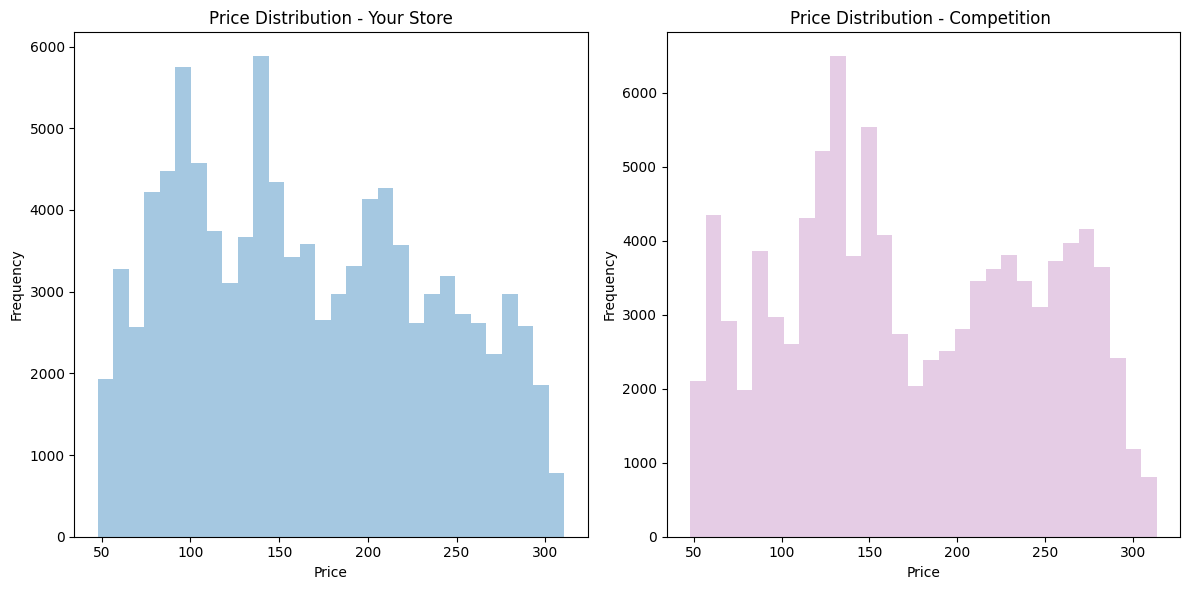

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(data['Price'],bins=30,alpha=0.4,label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1,2,2)
plt.hist(data['Competition_Price'],bins=30,alpha=0.2,color='purple',label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition ')
plt.tight_layout()

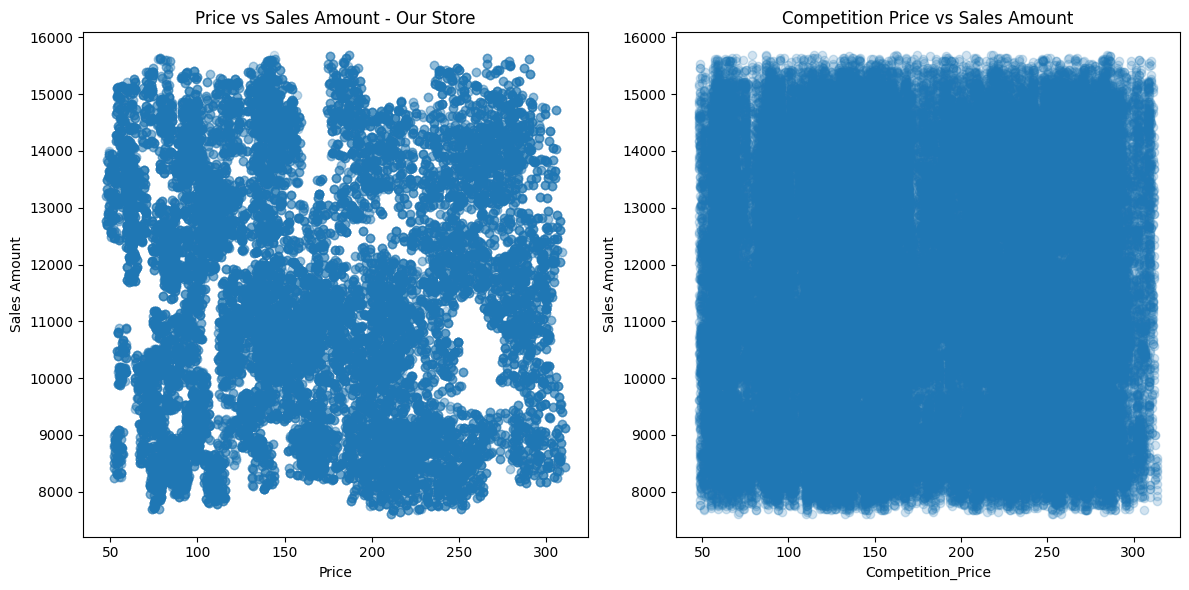

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.scatter(data['Price'],data['Sales_Amount'],alpha=.1,label='Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1,2,2)
plt.scatter(data['Competition_Price'],data['Sales_Amount'],alpha=.2,label='Competition')
plt.xlabel('Competition_Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')
plt.tight_layout()


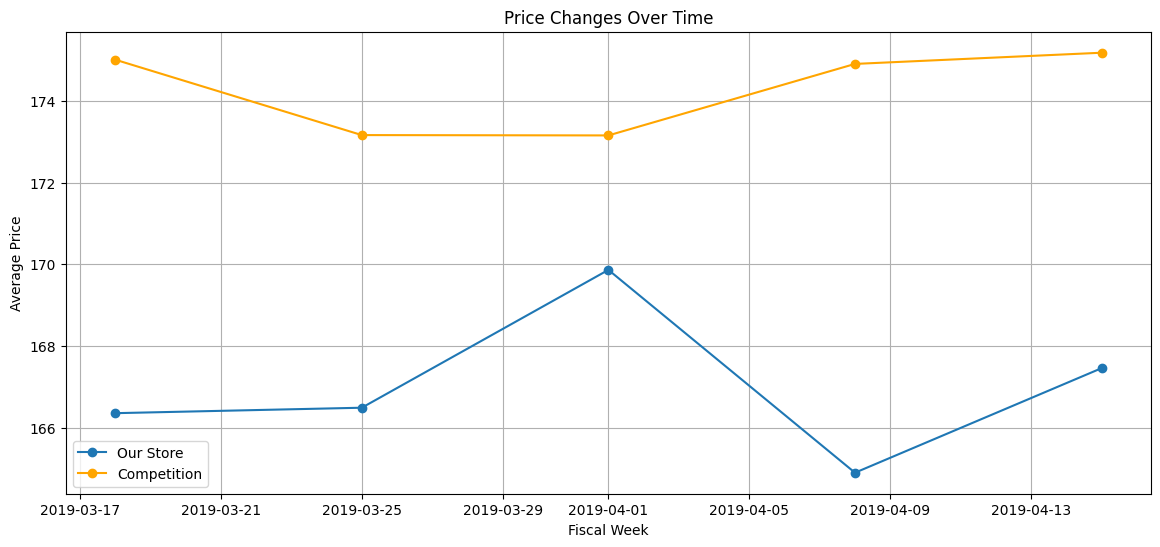

In [ ]:
data['Fiscal_Week_ID'] = pd.to_datetime(data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize=(14, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

analyze how changes in prices affect the change in quantity sold. For this, we need to calculate price elasticity. Here’s the formula used to calculate price elasticity

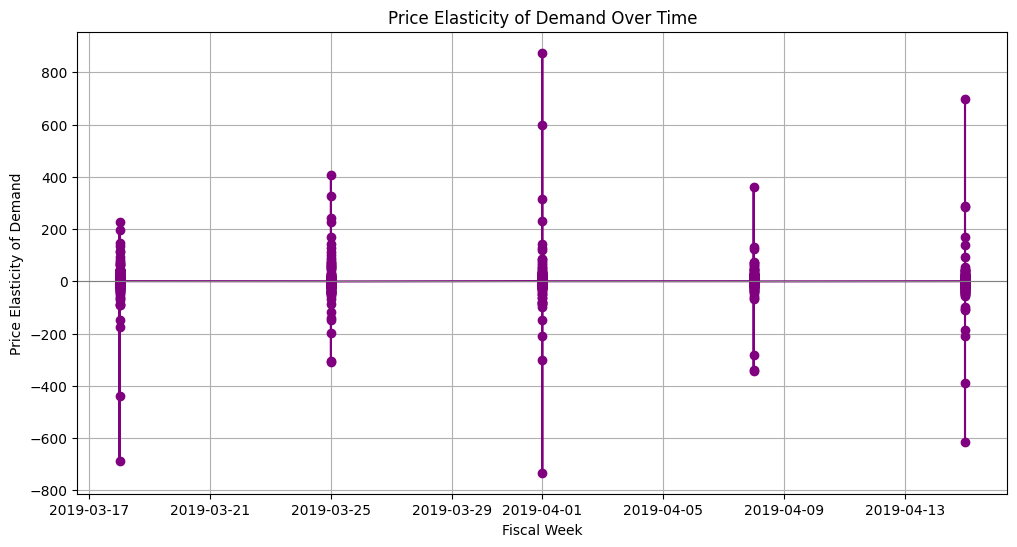

In [ ]:
data['Price_Change'] = data['Price'].pct_change()
data['Quantity_Change'] = data['Item_Quantity'].pct_change()


data['Elasticity'] = data['Quantity_Change'] / data['Price_Change']
data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)


data.dropna(subset=['Elasticity'], inplace=True)
plt.figure(figsize=(12, 6))

plt.plot(data['Fiscal_Week_ID'], data['Elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

calculate and compare the total sales amounts for our store and the competition


In [ ]:
total_sales_your_store = data['Sales_Amount'].sum()
total_sales_competition = (data['Competition_Price'] * data['Item_Quantity']).sum()

total_qty_your_store = data['Item_Quantity'].sum()
total_qty_competition = data['Item_Quantity'].sum()  # assuming quantities sold are the same for comparison

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})
summary

,Metric,Your Store,Competition
0,Total Sales Amount,1.140889e+08,696114949.1
1,Total Quantity Sold,3.984317e+06,3984317.0


Now, we’ll analyze how the sales amounts vary across different price brackets to identify if there are specific price ranges where the competition outperforms our store:

In [ ]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
data['price_bracket'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)
data['competition_price_bracket'] = pd.cut(data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
data['competition_sales_amt'] = data['Competition_Price'] * data['Item_Quantity']
sales_by_bracket_competition = data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

<ipython-input-24-cfac18c98d2b>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_your_store = data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
<ipython-input-24-cfac18c98d2b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competition = data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()


,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29634123.98,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.908800e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


The table shows the total sales amounts for both our store and the competition across different price brackets. Here are some key observations:


0-50 Bracket: The competition has significantly higher sales in this bracket.
51-100 Bracket: The competition outperforms our store by a wide margin.
101-150 Bracket: The competition’s sales are much higher than our store’s sales.
151-200 Bracket: The competition again has significantly higher sales.
201-250 Bracket: The competition’s sales are nearly double those of our store.
251-300 Bracket: The competition has higher sales, but the gap is smaller compared to other brackets.
301-350 Bracket: The competition has higher sales, though the overall sales amount is lower in this bracket compared to others.

Price Optimization with Dynamic Pricing

let’s start by defining a dynamic pricing model and simulating its performance. Here are the steps we will use:

We will enhance our dataset to include segments and calculate price elasticity for each segment.
We’ll create segments based on purchasing behaviour and calculate price elasticity for each segment.
We’ll define dynamic pricing rules based on competitor pricing, demand, and elasticity.
We’ll simulate the dynamic pricing model and compare it with the existing pricing strategy.
Now, let’s start with segmenting the data and calculating price elasticity for each segment:

In [ ]:
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary =data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price

pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment

segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:

    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

<ipython-input-33-364c30235d69>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
<ipython-input-33-364c30235d69>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
<ipython-input-33-364c30235d69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,segment,avg_elasticity
0,Medium,0.071167
1,High,0.143993


In [ ]:
# prompt: remove messages from output in last cell

import pandas as pd
# calculate average price and total quantity sold for each item
item_summary =data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price

pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment

segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:

    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

# No messages in the output
elasticity_df


NameError: name 'data' is not defined

In [ ]:
from google.colab import files

# Replace 'your_notebook_name.ipynb' with the actual name of your notebook file
files.download('Untitled5.ipynb')

FileNotFoundError: Cannot find file: Untitled5.ipynb